Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

NAME = "Ricardo Bamberg Marques"


---

# Fires in the Amazon

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and SNRs and UNRs of the group members, like so

|Name|SNR|UNR|
|----|---|----|
|ricardo marques|2024108|u589794|




See [the webpage](https://janboone.github.io/applied-economics/#org065a005) for details of what we expect to see in this assignment.



# Research question

Did wilfires really increase in the Amazon after Jair Bolsonaro became Brazil´s president ?

# Motivation

The Amazon rainforest is the largest rainforest in the world covering an estimated 6.7m sqkm spread throughout 9 countries in South America. Most of it, approximately 60% are located in Brazil, meaning that Brazil´s environmental policy will have a direct effect on the conservation of the rainforest. Brazil´s National Institue for Space Research (INPE – Instituto Nacional de Pesquisa Espacial) uses a range of satellites to monitor the whole country for different purposes, including deforestation. 

Within INPE, we can look at the PRODES (Programa de Cálculo Desflorestamento da Amazônia) project responsible for monitoring deforestation in the Amazon. According to the data gathered by PRODES solely between the years of 2014 and 2019 an area slightly larger than the Netherlands was taken down from the Amazon Forest.  

As of 1st of January 2019, Jair Messias Bolsonaro stepped into office to become Brazil´s new president. Famous for being a right-wing politician, with some conservative views regarding climate change and environmental preservation, Bolsonaro has cut back law enforcement funding making it easier for illegal deforestation to take place. This combination of controversial speech with the fires taking place around August 2019 has drawn international attention and made the headlines by many news outlets worldwide. However, deforestation in the Amazon is not new, so indeed how the fires from 2019 compare to previous years? That would be the main question driving this study.


# Method

Bazil´s National Institue for Space Research (Instituto Nacional de Pesquisa Espacial - INPE) currently uses 9 satellites to collect images and monitor forest fires and overall deforestation in Brazil. This data is openly available to the public and can be exported via a CSV file containing up to a year worth of observations. Although there are 9 satellites being used the institute uses only one, which is the reference satellite, to construct a time-series and allow the comparison of trends over time. Since 2002 the AQUA_M-T is being employed as the reference satellite.

The data generated by the reference satellite does not capture all the fires, and therefore underestimates the real amount of fires. The AQUA_M-T orbits 710km above the earth´s surface and is able to spot fires that are at least 30m long and 1m wide. It was deployed in 2002 and soon should retire. In 2012 a newer and more precise satellite was deployed, the NPP-SUOMI, and will become the reference satellite. It uses a sensor that collects approximately 10 times the amount of fire pixels in comparison to the one used by the AQUA_M-T, because of that the Institute is also working on making both time series compatible.

After analyzing the fire trend from the year 2019 obtained from the reference satellite, I shall also use those observations to compare to the series constructed from the data of the p5 previous years. Because of the limitations mentioned above, I will also compare it to the full estimation provided by the Institute, which has estimated the total amount of fires for over 20 years.


# Preview of the answers

Compared to the year of 2018 the number of fires did increase, however the number is slightly below the average for the previous 5 years.

August of 2019 especially registered a high amount of fires, which might have inflated the difference.

# Main assumptions

During this study, all of the data used was collected by satellite images. There are some technical aspects that fall beyond economic research regarding such images. Apart from that, the aim of this study is not to establish a causal relationship between a set of variables and the number of fires. Its focus is to evaluate how the presentation of data can tell different stories. It is important to acknowledge however that by not controlling for natural events, such as lightning strikes and precipitation, the results might indeed be biased. One of the main assumptions then is that all fires or ate least the definite majority were caused by men, and differences within natural conditions, except for the seasonality of dry and wet season, did not have a significant role.

# Cleaning Data

All the data used in this study was obtained from Bazil´s National Institue for Space Research (Instituto Nacional de Pesquisa Espacial - INPE) website. I uploaded data from the 5 years before Jair Bolsonaro came into the presidency (2014-2018) as well as for the year of 2019, his first year as president. As recommended by the Institue, I´ll be mostly using the data collected from the reference satellite (AQUA_M-T), as it is the one the Institute uses to assemble their time series.
In order to make the analysis more robust, I also uploaded the CSV file containing the total estimate of fires in the Amazon per year.

All the files are uploaded in the repository in a csv format (data/final_assignment/fires_####(year))


Importing the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pymc3 as pm
import wbdata as wb
import datetime


/opt/conda/lib/python3.7/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Uploading the data, each csv file contains the reference satelite observations taken each year.


In [2]:
fires_2014 = pd.read_csv("data/final_assignment/fires_2014.csv")
fires_2015 = pd.read_csv("data/final_assignment/fires_2015.csv")
fires_2016 = pd.read_csv("data/final_assignment/fires_2016.csv")
fires_2017 = pd.read_csv("data/final_assignment/fires_2017.csv")
fires_2018 = pd.read_csv("data/final_assignment/fires_2018.csv")
fires_2019 = pd.read_csv("data/final_assignment/fires_2019.csv")
total_fires = pd.read_csv("data/final_assignment/total_fire_obs.csv")

Firstly, to get a sense of the Dataframes let´s call the head() method to see how they look like. As we are dealing with more than one DataFrame to make things easier I created a list called data[], and we can apply the method .head() to all the values within the list.

In [3]:
data = [fires_2014, fires_2015, fires_2016, fires_2017, fires_2018, fires_2019]

data_head = [x.head() for x in data]; data_head #.head() method to all the imported DataFrames

[              datahora  satelite    pais    estado     municipio     bioma  \
 0  2014/01/01 17:38:00  AQUA_M-T  Brasil      PARA  MONTE ALEGRE  Amazonia   
 1  2014/01/01 17:37:00  AQUA_M-T  Brasil  AMAZONAS       AUTAZES  Amazonia   
 2  2014/01/01 15:59:00  AQUA_M-T  Brasil  MARANHAO    TURILANDIA  Amazonia   
 3  2014/01/01 17:39:00  AQUA_M-T  Brasil   RORAIMA       AMAJARI  Amazonia   
 4  2014/01/01 17:39:00  AQUA_M-T  Brasil   RORAIMA   ALTO ALEGRE  Amazonia   
 
    diasemchuva  precipitacao  riscofogo  latitude  longitude  frp  
 0          NaN           NaN        NaN    -1.506    -54.074  NaN  
 1          NaN           NaN        NaN    -3.877    -59.348  NaN  
 2          NaN           NaN        NaN    -2.125    -45.470  NaN  
 3          NaN           NaN        NaN     3.609    -61.824  NaN  
 4          NaN           NaN        NaN     3.130    -61.388  NaN  ,
               datahora  satelite    pais       estado  municipio     bioma  \
 0  2015/11/07 16:30:00  AQUA_


As the Dataframes are quite large it might also be usefull to apply the info() method to gather some more information. As we did we the head() method, we will aply the info() method to the same list, data[].


In [4]:
data_info = [x.info() for x in data]; data_info #info() method to all the imported DataFrames

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82554 entries, 0 to 82553
Data columns (total 12 columns):
datahora        82554 non-null object
satelite        82554 non-null object
pais            82554 non-null object
estado          82554 non-null object
municipio       82554 non-null object
bioma           82554 non-null object
diasemchuva     0 non-null float64
precipitacao    80009 non-null float64
riscofogo       74258 non-null float64
latitude        82554 non-null float64
longitude       82554 non-null float64
frp             0 non-null float64
dtypes: float64(6), object(6)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106438 entries, 0 to 106437
Data columns (total 12 columns):
datahora        106438 non-null object
satelite        106438 non-null object
pais            106438 non-null object
estado          106438 non-null object
municipio       106438 non-null object
bioma           106438 non-null object
diasemchuva     0 non-null float64
preci

[None, None, None, None, None, None]

As the DataFrame containing the estimation done by the Institue using not only the reference satelite is quite different than the previous ones, let´s call the .head() method separetely as well as the .tail() method as we will be focusing on the last years from the sample

In [5]:
total_fires.head()

,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,-,-,-,-,-,2620,5706,29683,29627,13160,4178,2640,87614
1,1999,221,385,153,116,764,2401,5681,29133,24604,17826,4999,1782,88065
2,2000,133,202,463,123,1371,4848,2657,16813,15473,14525,6207,3310,66125
3,2001,228,733,1137,711,1283,7117,3715,23902,25897,19264,9054,4402,97443
4,2002,720,765,989,761,2769,8794,11661,53377,64827,35967,27519,10014,218163


In [6]:
total_fires.tail(10) #we will be looking at the values from 2014 to 2018


,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
16,2014,1820,585,1216,1138,1687,4213,6427,29861,28729,20593,13923,8443,118635
17,2015,2611,1251,858,1153,1202,3610,5808,28589,40452,29112,19055,12665,146366
18,2016,4868,2188,2497,2049,2061,3831,12050,27391,28295,19771,13529,5516,124046
19,2017,1056,522,1121,1100,1792,3615,11779,27712,55994,20464,15711,8545,149411
20,2018,1720,992,1764,828,1909,3846,7572,15001,31140,13322,9948,2366,90408
21,2019,1852,1675,3943,2193,2141,4838,8567,39177,32602,11848,12949,4306,126091
22,2020,1613,-,-,-,-,-,-,-,-,-,-,-,1613
23,Máximo*,4868,2188,3943,2193,5155,14493,24899,73683,101817,40605,31697,18139,275645
24,Média*,1883,976,1310,1069,2000,5191,10028,34646,45997,23277,15362,7419,148830
25,Mínimo*,133,202,153,116,764,2055,2657,12653,15473,11848,4178,1782,66125


As mentioned earlier, the data gathered comes from the Brazillian National Institue for Espace Research which means that the columns in the DataFrames are all labelled in portuguese. As I do not expect many portugues speaking people and to facilitate the analysis will be usefull to translate the column names to english. Once more, let´s create a function for that:

In [7]:
def translate_data(df):
    """transaltes column names' from portuguese to english"""
    
    df = df.rename(columns={"pais": "country",
                    "estado":"estate",
                    "municipio":"city",
                    "bioma":"biome",
                    "diasemchuva":"days_without_rain",
                    "precipitacao":"precipitation",
                    "riscofogo":"fire_hazard",
                   "regiaoespecial":"region"}, inplace = True)
    
    return df



In [8]:
data_english = [translate_data(x) for x in data] #translating the column names

Let´s take a look at the 2014 DataFrame to chack if our translation worked

In [9]:
fires_2014.head()

,datahora,satelite,country,estate,city,biome,days_without_rain,precipitation,fire_hazard,latitude,longitude,frp
0,2014/01/01 17:38:00,AQUA_M-T,Brasil,PARA,MONTE ALEGRE,Amazonia,NaN,NaN,NaN,-1.506,-54.074,NaN
1,2014/01/01 17:37:00,AQUA_M-T,Brasil,AMAZONAS,AUTAZES,Amazonia,NaN,NaN,NaN,-3.877,-59.348,NaN
2,2014/01/01 15:59:00,AQUA_M-T,Brasil,MARANHAO,TURILANDIA,Amazonia,NaN,NaN,NaN,-2.125,-45.470,NaN
3,2014/01/01 17:39:00,AQUA_M-T,Brasil,RORAIMA,AMAJARI,Amazonia,NaN,NaN,NaN,3.609,-61.824,NaN
4,2014/01/01 17:39:00,AQUA_M-T,Brasil,RORAIMA,ALTO ALEGRE,Amazonia,NaN,NaN,NaN,3.130,-61.388,NaN


Once more we will have to take a different approach for the total_fires DataFrame:


In [10]:
#Firstly, let´s create a list of new labels
labels = ["Year","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",
          "December","Total"]
column_name = list(total_fires.columns) #let´s extract our column names


new_names = dict(zip(column_name, labels)) #create a dictionary zipping the old and new values
new_names

{'Unnamed: 0': 'Year',
 'Janeiro': 'January',
 'Fevereiro': 'February',
 'Março': 'March',
 'Abril': 'April',
 'Maio': 'May',
 'Junho': 'June',
 'Julho': 'July',
 'Agosto': 'August',
 'Setembro': 'September',
 'Outubro': 'October',
 'Novembro': 'November',
 'Dezembro': 'December',
 'Total': 'Total'}

Now we can replace the Portugues names to English ones:

In [11]:
total_fires.rename(columns=new_names, inplace = True) #translating the column names
total_fires.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1998,-,-,-,-,-,2620,5706,29683,29627,13160,4178,2640,87614
1,1999,221,385,153,116,764,2401,5681,29133,24604,17826,4999,1782,88065
2,2000,133,202,463,123,1371,4848,2657,16813,15473,14525,6207,3310,66125
3,2001,228,733,1137,711,1283,7117,3715,23902,25897,19264,9054,4402,97443
4,2002,720,765,989,761,2769,8794,11661,53377,64827,35967,27519,10014,218163


As the aim of the study is to evaluate the evolution of fire spotings over time there are some values that wont be needed so we might as well drop them to make our data set more concise.

In [12]:

fires_2014.drop(["satelite","country","city","fire_hazard","frp"], axis=1,inplace = True)
fires_2015.drop(["satelite","country","city","fire_hazard","frp"], axis=1,inplace = True)
fires_2016.drop(["satelite","country","city","fire_hazard","frp"], axis=1,inplace = True)
fires_2017.drop(["satelite","country","city","fire_hazard","frp"], axis=1,inplace = True)
fires_2018.drop(["satelite","country","city","fire_hazard","frp"], axis=1,inplace = True)
fires_2019.drop(["satelite","country","city","fire_hazard","frp"], axis=1,inplace = True)

In [13]:
fires_2014.head()

,datahora,estate,biome,days_without_rain,precipitation,latitude,longitude
0,2014/01/01 17:38:00,PARA,Amazonia,NaN,NaN,-1.506,-54.074
1,2014/01/01 17:37:00,AMAZONAS,Amazonia,NaN,NaN,-3.877,-59.348
2,2014/01/01 15:59:00,MARANHAO,Amazonia,NaN,NaN,-2.125,-45.470
3,2014/01/01 17:39:00,RORAIMA,Amazonia,NaN,NaN,3.609,-61.824
4,2014/01/01 17:39:00,RORAIMA,Amazonia,NaN,NaN,3.130,-61.388


Once more we will take a different aproach for the total_fires DataFrame. As our analysis will start only from the Year 2014 onward let´s drop all the previous columns:

In [14]:
total_fires.drop(total_fires.index[0:16], inplace = True) #dropping the first columns
total_fires.drop(total_fires.index[6:10], inplace = True) #dropping the last columns


In [15]:
total_fires.set_index("Year", inplace = True) #setting the year as index
total_fires.head()

,January,February,March,April,May,June,July,August,September,October,November,December,Total
Year,,,,,,,,,,,,,
2014,1820,585,1216,1138,1687,4213,6427,29861,28729,20593,13923,8443,118635
2015,2611,1251,858,1153,1202,3610,5808,28589,40452,29112,19055,12665,146366
2016,4868,2188,2497,2049,2061,3831,12050,27391,28295,19771,13529,5516,124046
2017,1056,522,1121,1100,1792,3615,11779,27712,55994,20464,15711,8545,149411
2018,1720,992,1764,828,1909,3846,7572,15001,31140,13322,9948,2366,90408


# Data Analysis


Now that we have imported our data, changed the labels to English and taken a look at it we can now start doing our analysis.


From our DataFrame we can see that each row represents one spotting from the satelite0, ordered by date and time of day. Each spotting is caught by the same satelite and it covers all the region occupied by the Amazon Forest. In order to take into account the seasonality of our data (rainy season and dry season) as well as to make the analysis more clear it will be usefull to group the data by month. By doing so it is possible to measure how many fire-spots were detected each month within our data set. Let´s define a function that can do that:


In [16]:

def group_data_by_month(df):
    """groups the data from each DataFrame by month, and count the number of occurencies in each month"""
    
    df['datahora'] = pd.to_datetime(df['datahora'], format='%Y/%m/%d %H:%M:%S')
    df_group = df.groupby(pd.Grouper(key='datahora',freq='m')).count()
    
    return df_group


After defining our function we can pass it throught all of our DataFrames, store it in a new list called data_groupped[]. After that, we can update each DataFrame to guarantee that we are using the groupped one, and not the original one.

In [17]:
data_groupped = [group_data_by_month(x) for x in data]; data_groupped #grouping our data by month
fires_2014_month = data_groupped[0]
fires_2015_month = data_groupped[1]
fires_2016_month = data_groupped[2]
fires_2017_month = data_groupped[3]
fires_2018_month = data_groupped[4]
fires_2019_month = data_groupped[5]

To make sure that our data was properly groupped and assigned to the right variable name let´s take the a look at the new data for the year of 2016 by calling fires_2016_month:

In [18]:
fires_2016_month #printing out the new grouped DataFrame to check if the grouping was succesfull


,estate,biome,days_without_rain,precipitation,latitude,longitude
datahora,,,,,,
2016-01-31,4657,4657,0,4657,4657,4657
2016-02-29,1559,1559,0,1559,1559,1559
2016-03-31,2024,2024,0,2024,2024,2024
2016-04-30,1075,1075,0,1075,1075,1075
2016-05-31,895,895,0,895,895,895
2016-06-30,1663,1663,0,1663,1663,1663
2016-07-31,6120,6120,0,6120,6120,6120
2016-08-31,18340,18340,0,14537,18340,18340
2016-09-30,20460,20460,0,0,20460,20460


As we will only need the number of occurrences, by applying the method .count() to our grouping function, the values that we get on columns such as "satelite", "country" and "estate" will also give us the number of fire spots in any given month. We cannot say the same for all columns as some might have missing values. In those first 3 columns there are no missing values so the counted values represents the total number of fires spotted by the satelite.

Most reports about the rise of fires relate to a sizeable increase from the period from mid-2018 to August 2019 in comparisson to the previous year. As now it is possible to acces the data for the whole Year of 2019 let´s plot both years, 2018 and 2019, to see how big was this difference


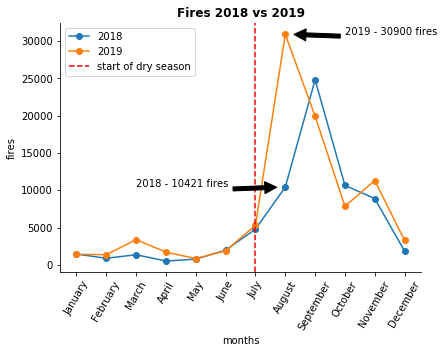

In [19]:
#Firstly, let´s create a list of months to more easily lable our graph
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",
          "December"]
#now let´s plot our first graph 
x = months
y_1 = fires_2018_month["estate"]
y_2 = fires_2019_month["estate"]
plt.plot(x, y_1, marker = "o", label = "2018")
plt.plot(x, y_2, marker = "o", label = "2019")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=60)
plt.axvline(6, color = "r", label="start of dry season", linestyle = "--")
plt.xlabel("months")
plt.ylabel("fires")
plt.title("Fires 2018 vs 2019", fontweight = "bold")
plt.legend()
plt.annotate('2018 - 10421 fires', xy=(6.8, 10421), xytext=(2, 10421),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("2019 - 30900 fires", xy=(7.2, 30900), xytext=(9, 30900),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

From the graph above we can clearly see that there was a huge increase in the number of fires in the month of August 2019 compared to the same month of 2018, althought the trend is fairly similar in all the other months.

In [20]:
august_2018 = fires_2018_month['estate'][7] #returns the value for August 2018
august_2019 = fires_2019_month['estate'][7] #returns the value for August 2019

difference = (int(august_2019)-int(august_2018)) #takes the difference of both values

print(difference)

total_2018 = np.sum(fires_2018_month['estate']) #returns the values for the whole year of 2018
total_2019 = np.sum(fires_2019_month['estate']) #returns the values for the whole year of 2019

difference_2 = (int(total_2019)-int(total_2018)) #takes the difference of both values

print(total_2018, total_2019,difference_2)

increase = difference_2/int(total_2018) #calculates the increase in fires in 2019 compared to 2019

print(increase)

20479
68345 89176 20831
0.3047918648035701


From the simple calculations made above we can see that indeed not only was the spike in fires in August 2019 was extremely significant (20479 more fires as compared to 2018), it represented almost the total difference between both years (20831 more fires), which is aproximately a 30% increase in the number of fires for the year 2019.

As it can be seen from the first graph, there is a very strong seasonality effect. Indeed the Amazon Rainforest has a wet season and a dry season. One of the major consequences of this dry season is that fires can spread more easily, creating the distinct spikes in the graph, between July and October. In order to go beyond what the headlines say and take a deeper look at forest fires the data for the previous 5 years might help telling a more complete story.The data from the years from 2014 to 2018 were uploaded individually, with counts for each year In order to compare the data from the previous five years to the year of 2019 let´s first calculate the monthly mean for the period and use that to compare to the year of 2019.

In [21]:

fires_groupped = [fires_2014_month,fires_2015_month,fires_2016_month,fires_2017_month,
                  fires_2018_month] # a list of all the yearly groupped by month
                                                                                                
means = []

for ind in range(0,12):
    """calculates the monthly mean of the years 2014 to 2018"""
    mean = np.mean([x["estate"][ind] for x in fires_groupped]) # a list comprehension to calculate the means
    means.append(mean)
    
print(means)

[2102.4, 869.2, 1140.2, 720.0, 710.4, 1663.4, 4895.4, 18117.8, 26336.0, 14407.2, 12740.0, 6805.4]


As it can be seen the monthly means for the years of 2014 to 2018 were calculated and stored in the list means[].
However, such list only contains the values, without any kind of label to indicate from which month such value belong too. 
For that I will create a dictionary means_month{} that can store our values with the proper indexing.

In [22]:
means_month = dict(zip(months,means)) # creating a dictionary using the months as index
means_month

{'January': 2102.4,
 'February': 869.2,
 'March': 1140.2,
 'April': 720.0,
 'May': 710.4,
 'June': 1663.4,
 'July': 4895.4,
 'August': 18117.8,
 'September': 26336.0,
 'October': 14407.2,
 'November': 12740.0,
 'December': 6805.4}

After creating a dictionary of our average values let´s plot a graph to showcase how fires increase considerably during the dry season

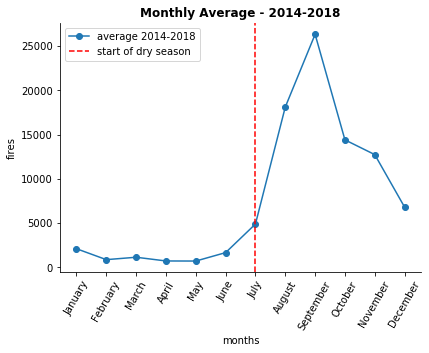

In [23]:
sns.set
plt.plot(months, means, marker = "o", label = "average 2014-2018")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=60)
plt.axvline(6, color = "r", label="start of dry season", linestyle = "--")
plt.xlabel("months")
plt.ylabel("fires")
plt.title("Monthly Average - 2014-2018", fontweight="bold")
plt.legend()
plt.show()

As our year of interest is 2019 let´s plot a similar graph

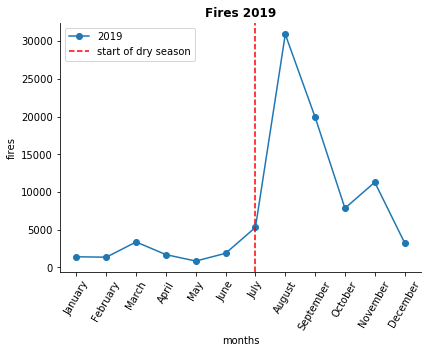

In [24]:
x = months
y = fires_2019_month["estate"]

plt.plot(x, y, marker = "o", label = "2019")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=60)
plt.axvline(6, color = "r", label="start of dry season", linestyle = "--")
plt.xlabel("months")
plt.ylabel("fires")
plt.title("Fires 2019", fontweight = "bold")
plt.legend()
plt.show()

Now, if we merge the two, we can have a better comparison:

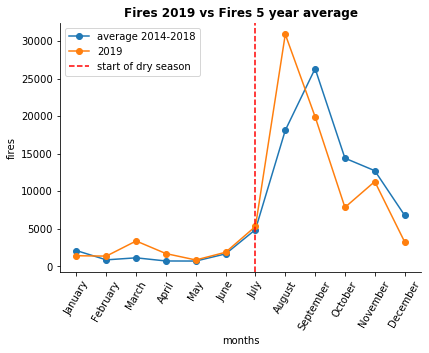

In [25]:
plt.plot(months, means, marker = "o", label = "average 2014-2018")
plt.plot(x, y, marker = "o", label = "2019")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=60)
plt.axvline(6, color = "r", label="start of dry season", linestyle = "--")
plt.xlabel("months")
plt.ylabel("fires")
plt.title("Fires 2019 vs Fires 5 year average", fontweight = "bold")
plt.legend()
plt.show()

Comparing the year of 2019 to the average of the previous 5 years, similarly to what we saw when comparing with 2018, August of 2019 stands out both compared to the average values for the previous years.
Therefores, as it was done with the data for 2018 lets compare the August, and total values of 2019 with the previous 5 years.

In [26]:
august_5years = means[7] #returns the value of August for the previous 5 years

difference_3 = (int(august_2019)-int(august_5years))

total_5years = np.sum(means) #returns the total average for the previous 5 years

difference_4 = (int(total_2019)-int(total_5years))

print(difference_3, difference_4)

12783 -1331


With the calculations we see that indeed August 2019 was significantly higher than the average 5 previous Augusts', however what can also be seen is that when we consider the total amount of fires of the year 2019, it actually was lower than the average for the previous 5 years. Differently as when comparing solely to 2018, the spike in August was not large enough to also make the total amount of fires in 2019 higher than the average.

Two interesting facts can also be observed in the graphs: firstly it seems that August 2019 might have been an "outlier", secondly, on average, it appears that the month of September usually registers the highest amount of fires. So let´s take a closer look into that

Let´s create two lists, one with the values for August,and one with the values for September and next plot them to see how they compare

In [27]:
#extract the values of August
august_2014 = fires_2014_month['estate'][7]
august_2015 = fires_2015_month['estate'][7]
august_2016 = fires_2016_month['estate'][7]
august_2017 = fires_2017_month['estate'][7]

august = [august_2014,august_2015,august_2016,august_2017,august_2018,august_2019,august_5years] #store all values in a list

#extract the values of September
september_2014 = fires_2014_month['estate'][8]
september_2015 = fires_2015_month['estate'][8]
september_2016 = fires_2016_month['estate'][8]
september_2017 = fires_2017_month['estate'][8]
september_2018 = fires_2018_month['estate'][8] 
september_2019 = fires_2019_month['estate'][8]
september_5years = means[8]

september = [september_2014,september_2015,september_2016,september_2017,september_2018,september_2019,
             september_5years] #store all values in a list

#calculate the total values per year
total_2014 = np.sum(fires_2014_month['estate'])
total_2015 = np.sum(fires_2015_month['estate'])
total_2016 = np.sum(fires_2016_month['estate'])
total_2017 = np.sum(fires_2017_month['estate'])

total = [total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_5years] #store all values in a list

years = ["2014","2015","2016","2017","2018","2019","average 2014-2018"] #creates a list of years


First, let´s plot for August

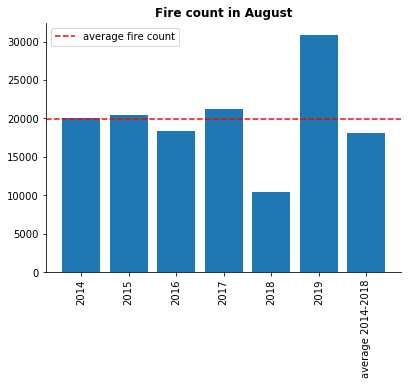

In [28]:
#plotting all August values
plt.bar(years, august) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Fire count in August", fontweight = "bold")
plt.axhline(np.mean(august), color = "r", label="average fire count", linestyle = "--")
plt.legend()
plt.show()

Second, let´s plot for September

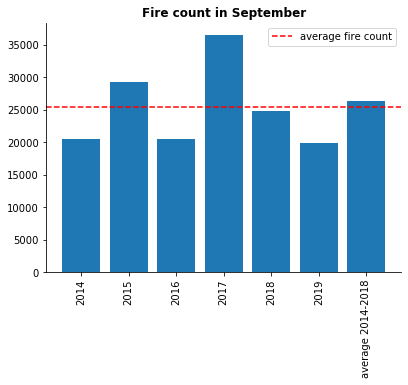

In [29]:
#plotting all September Values
plt.bar(years, september)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Fire count in September", fontweight = "bold")
plt.axhline(np.mean(september), color = "r", label="average fire count", linestyle = "--")
plt.legend()
plt.show()

Finally, let´s plot per total fire count per year

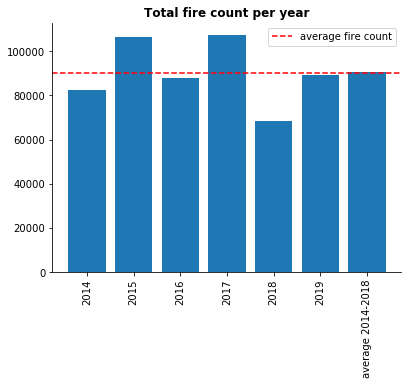

In [30]:
plt.bar(years, total)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Total fire count per year", fontweight = "bold")
plt.axhline(np.mean(total), color = "r", label="average fire count", linestyle = "--")
plt.legend()
plt.show()

As all the graphs were done using the data collected by the reference satelite (AQUA_M-T), the trens we see should be reliable, but the total amount of fires spotted will most likely be underestimated. From the DataFrame total_fires we can extract the total estimation of fires spotted in the Amazon for our period of interest.
Therefore, let´s plot the total values to see if we can spot the same patterns

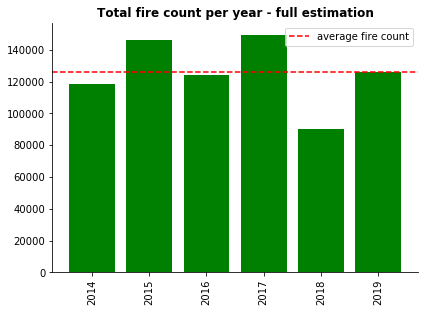

In [121]:
plt.bar(years[0:6], total_fires['Total'], color="green")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Total fire count per year - full estimation", fontweight = "bold")
plt.axhline(np.mean(total_fires['Total']), color = "r", label="average fire count", linestyle = "--")
plt.legend()
plt.show()


At a first glance and as expected it appears that the values follow the same trend but in different levels. To do a final check lets plot them together.

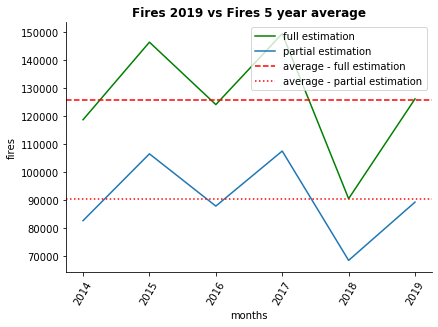

In [134]:
plt.plot(years[0:6], total_fires['Total'], color="green", label= "full estimation")
plt.plot(years[0:6], total[0:6], label = "partial estimation")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.xticks(rotation=60)
plt.axhline(np.mean(total_fires['Total']), color = "r", label="average - full estimation", linestyle = "--")
plt.axhline(np.mean(total), color = "r", label="average - partial estimation", linestyle = ":")
plt.xlabel("months")
plt.ylabel("fires")
plt.title("Fires 2019 vs Fires 5 year average", fontweight = "bold")
plt.legend()
plt.show()

# Discussion and conclusion


There is no doubt that wildfires represent a huge threat to the Amazon Forest, especially considering that most fires are caused by humans. According to data by INPE most fires are caused to clear pastures, deforest and prepare the land for new plantations. They also estimate that Brasil deforests around 15 thousand sqkm per year of natural forests, this includes the Amazon but many other extremely important biomes spread around the whole country.

Around August 2019 Amazon wildfires made the headlines all over the world, and not unmistakenly, there was an approximate 30% increase in the fires from August 2019, compared to the same period in 2018. Adding to this Brazil´s new president Jair Messias Bolsonaro has built a reputation of disregard toward the Amazon Forest and even skepticism towards the total amount of deforestation. This skepticism led to the director of INPE being discharged from his position in early August.

However, this increase in fires in August does not tell the whole story. It marks the beginning of the dry season, so fires do increase, but they usually peak in September. What can be seen in 2019 when we compare to the previous years is that: August was clearly above average, and September was clearly below. Which might suggest that August 2019 was an outlier.
Looking for the total number of fires taking place in 2019, compared to 2018 we do see a clear increase. But once more, that’s not the full picture. When we compare such values to the ones from the previous years we can see that both years were actually below average, and 2018 registered a sizeable difference, having the least amount of fires. Both this outlier August and 2018 having the least amount of recorded fires most likely inflated the difference between both periods.
To make things perfectly clear, the aim of this study was not to judge the effects of Bolsonaro’s environmental policies, nor to say that the Amazon is not really in danger, and the numbers are all telling a lie. The purpose of this study is to exactly point out that the numbers tell os nothing, data does not speak, the way we manipulate and present the data that´s how one can create a story. 

I do believe that in the following years a more thorough study could and should be done to asses the environmental policies of the new government. However focusing not only on the Amazon, the forest is of extreme importance and does carry a name but is not the only biome endangered by man-made fires. Principally, when we consider the expansion of the agribusiness industry and its need for land, the Amazon might not be the focus of most of the deforestation.

In the following years, hopefully, INPE will be able to update its reference satellite, and there will be more precise measuring and overall more data regarding the fires. A study that controls the number of fires by not man-made causes, such as lightning strikes, might also provide new insights. Trying to measure the causality of different policies, different natural events and even different economic variables, such as the rise of the price of meat, will be an addition to the debate.

